In [218]:
pd.options.mode.chained_assignment = None

In [219]:
pip install pandas-datareader


In [220]:
pip install yfinance

In [221]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt 
import datetime
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib.pyplot import figure
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import scipy 
import scipy.stats as st
from scipy.stats import shapiro
from scipy import stats
from sklearn import metrics
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
import statsmodels as sm 
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip

In [222]:
data1 = yf.download(['NKE', 'GS', 'AAPL', 'DIS', '^DJI'], start="2010-01-01", end="2021-01-01", interval = '1mo')
data1=data1['Adj Close']
data1=data1.dropna()
data1.info()

[*********************100%***********************]  5 of 5 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2010-01-01 to 2020-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    132 non-null    float64
 1   DIS     132 non-null    float64
 2   GS      132 non-null    float64
 3   NKE     132 non-null    float64
 4   ^DJI    132 non-null    float64
dtypes: float64(5)
memory usage: 6.2 KB


In [223]:
data2 = pd.read_excel('FamaFrench.xlsx', index_col=0)  
data2=data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 196307 to 202103
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMB     693 non-null    float64
 1   HML     693 non-null    float64
 2   RMW     693 non-null    float64
 3   CMA     693 non-null    float64
 4   RF      693 non-null    float64
dtypes: float64(5)
memory usage: 32.5 KB


In [224]:
data2.reset_index(inplace = True)
data2['Date'] = pd.to_datetime(data2['Date'], format='%Y%m')

In [225]:
data2['Date'] = pd.to_datetime(data2['Date'], format='%Y%m')


In [226]:
data2V1 = (data2['Date'] > '2010-01-01') & (data2['Date'] <= '2020-12-01') 
data2V1 = data2.loc[data2V1] 


In [227]:
data2V1= data2V1.set_index(['Date'], drop=True)
data2V1

,SMB,HML,RMW,CMA,RF
Date,,,,,
2010-02-01,1.48,3.19,-0.40,1.43,0.00
2010-03-01,1.80,2.11,-0.67,1.69,0.01
2010-04-01,4.99,2.91,0.88,1.69,0.01
2010-05-01,0.09,-2.39,1.24,-0.19,0.01
2010-06-01,-2.46,-4.52,-0.31,-1.50,0.01
...,...,...,...,...,...
2020-08-01,-0.94,-2.94,4.27,-1.44,0.01
2020-09-01,0.07,-2.51,-1.15,-1.77,0.01
2020-10-01,4.76,4.03,-0.60,-0.53,0.01


## 1)Tranformation des variables

In [228]:
data1=data1.pct_change()
data1= data1.dropna()
data1

,AAPL,DIS,GS,NKE,^DJI
Date,,,,,
2010-02-01,0.065396,0.057191,0.051304,0.060392,0.025620
2010-03-01,0.148470,0.117478,0.093781,0.087278,0.051463
2010-04-01,0.111021,0.055285,-0.149036,0.036928,0.013999
2010-05-01,-0.016124,-0.092834,-0.006474,-0.046503,-0.079209
2010-06-01,-0.020827,-0.057451,-0.087770,-0.066731,-0.035772
...,...,...,...,...,...
2020-08-01,0.214380,0.127672,0.034906,0.146297,0.075742
2020-09-01,-0.100908,-0.059073,-0.013097,0.124480,-0.022805
2020-10-01,-0.060012,-0.022808,-0.059362,-0.043492,-0.046077


In [229]:
DF= pd.concat([data1,data2V1], axis=1)
DF

,AAPL,DIS,GS,NKE,^DJI,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,
2010-02-01,0.065396,0.057191,0.051304,0.060392,0.025620,1.48,3.19,-0.40,1.43,0.00
2010-03-01,0.148470,0.117478,0.093781,0.087278,0.051463,1.80,2.11,-0.67,1.69,0.01
2010-04-01,0.111021,0.055285,-0.149036,0.036928,0.013999,4.99,2.91,0.88,1.69,0.01
2010-05-01,-0.016124,-0.092834,-0.006474,-0.046503,-0.079209,0.09,-2.39,1.24,-0.19,0.01
2010-06-01,-0.020827,-0.057451,-0.087770,-0.066731,-0.035772,-2.46,-4.52,-0.31,-1.50,0.01
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.214380,0.127672,0.034906,0.146297,0.075742,-0.94,-2.94,4.27,-1.44,0.01
2020-09-01,-0.100908,-0.059073,-0.013097,0.124480,-0.022805,0.07,-2.51,-1.15,-1.77,0.01
2020-10-01,-0.060012,-0.022808,-0.059362,-0.043492,-0.046077,4.76,4.03,-0.60,-0.53,0.01


## 2) Test de la stationnarité : 

### p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [230]:
def adfuller_test(DF, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(DF, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [231]:
# ADF Test on each column

for name, column in DF.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AAPL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9991
 No. Lags Chosen       = 0
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DIS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4592
 No. Lags Chosen       = 1
 Critical value 1%     = -3.482
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Te

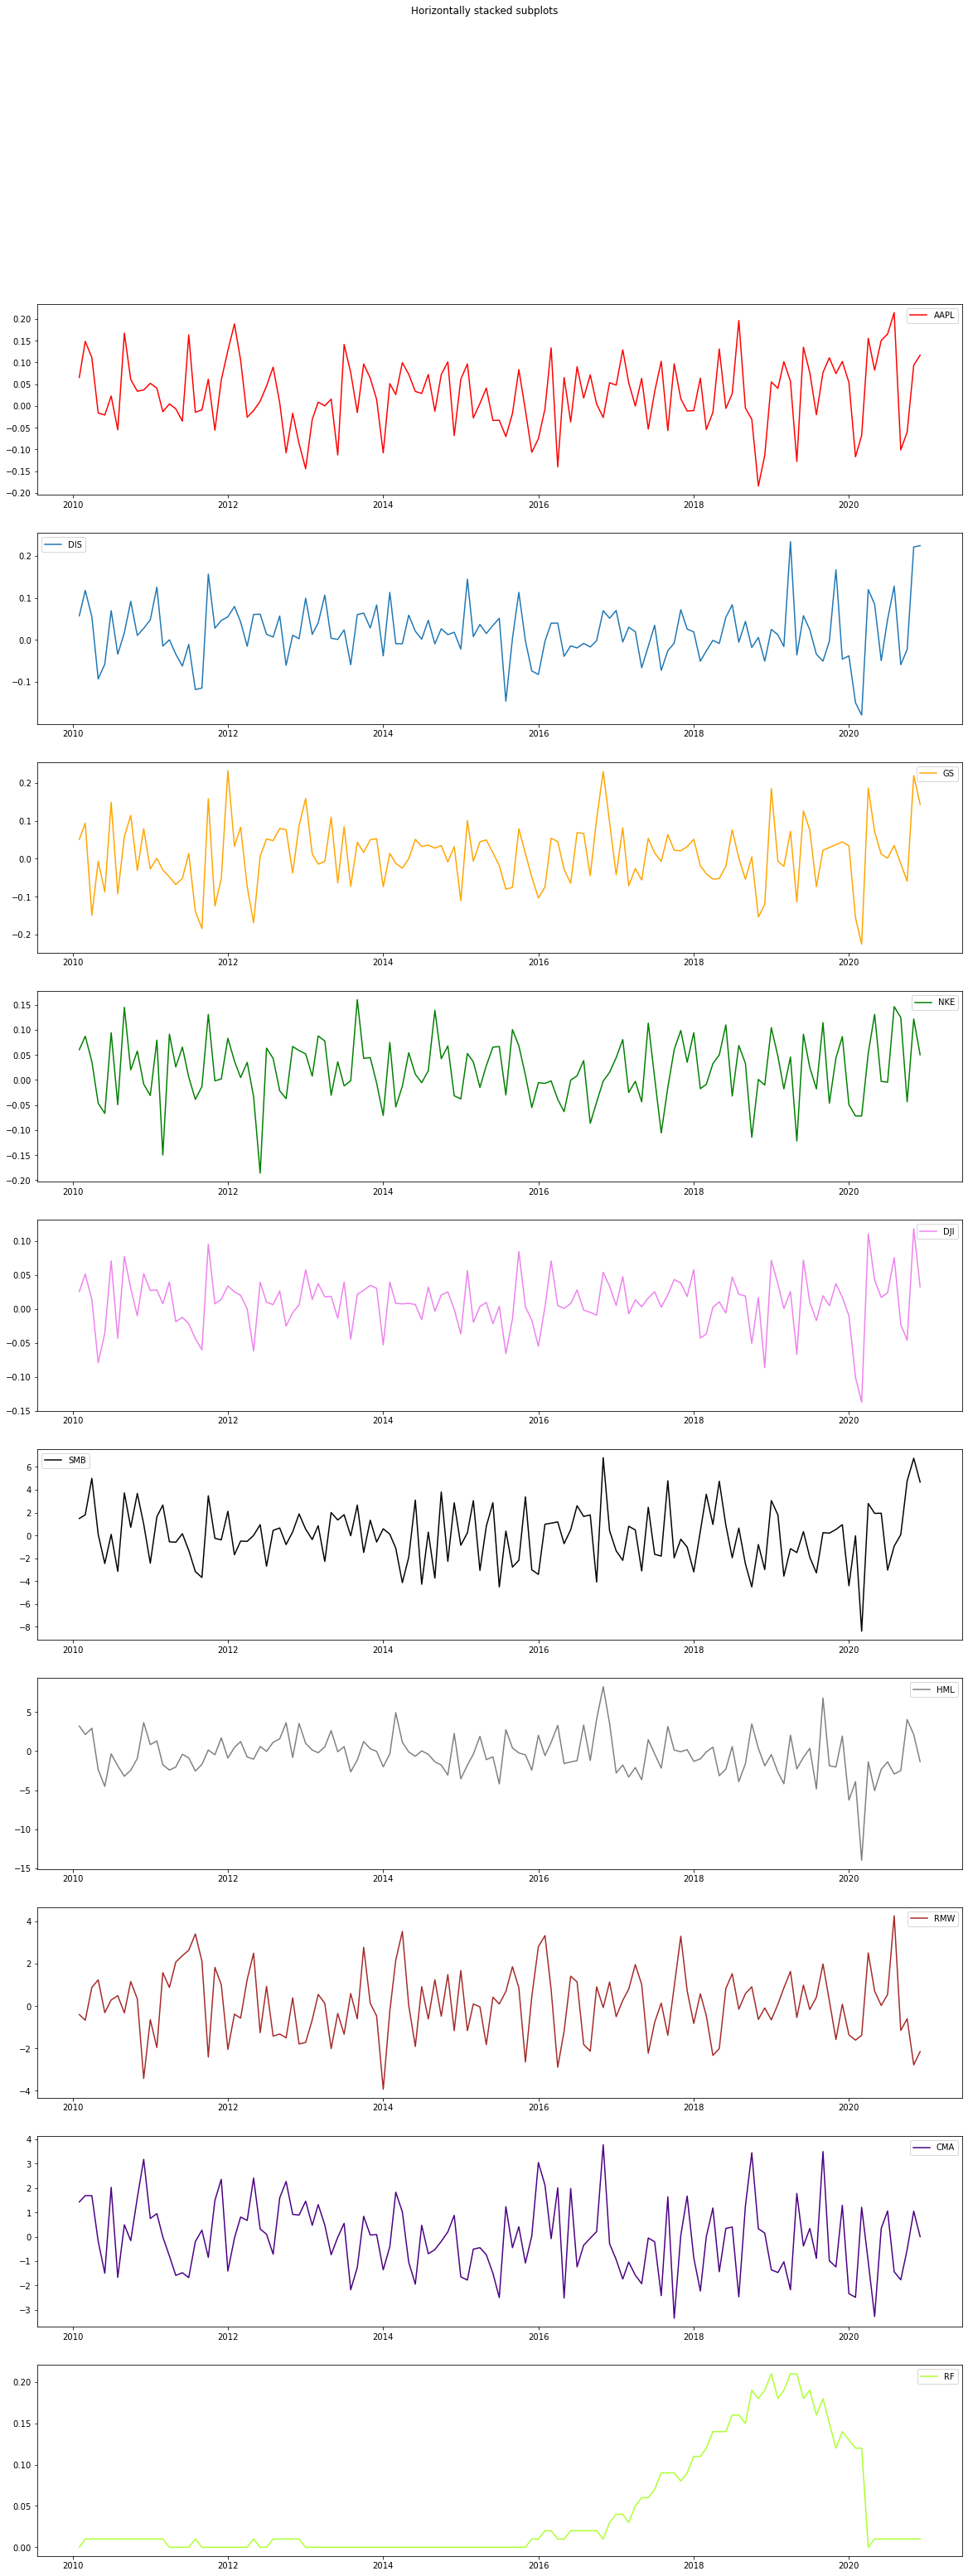

In [232]:
t = DF.index
s = DF

rcParams['figure.figsize'] = 20,50

fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(10)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(t,  DF['AAPL'], color = 'red', label = 'AAPL')
ax1.legend()
ax2.plot(t,  DF['DIS'], label = 'DIS')
ax2.legend()
ax3.plot(t,  DF['GS'], color = 'orange', label = 'GS')
ax3.legend()
ax4.plot(t,  DF['NKE'], color = 'green', label = 'NKE')
ax4.legend()
ax5.plot(t,  DF['^DJI'], color = 'violet', label = 'DJI')
ax5.legend()
ax6.plot(t,  DF['SMB'], color = 'black', label = 'SMB')
ax6.legend()
ax7.plot(t,  DF['HML'], color = 'gray', label = 'HML')
ax7.legend()
ax8.plot(t,  DF['RMW'], color = 'brown', label = 'RMW')
ax8.legend()
ax9.plot(t,  DF['CMA'], color = 'indigo', label = 'CMA')
ax9.legend()
ax10.plot(t,  DF['RF'], color = 'greenyellow', label = 'RF')
ax10.legend()
plt.show()

### Making RF stationnary : 

In [233]:

DF['RF1']=DF['RF'].diff()
DF=DF.dropna()
DF

,AAPL,DIS,GS,NKE,^DJI,SMB,HML,RMW,CMA,RF,RF1
Date,,,,,,,,,,,
2010-03-01,0.148470,0.117478,0.093781,0.087278,0.051463,1.80,2.11,-0.67,1.69,0.01,0.01
2010-04-01,0.111021,0.055285,-0.149036,0.036928,0.013999,4.99,2.91,0.88,1.69,0.01,0.00
2010-05-01,-0.016124,-0.092834,-0.006474,-0.046503,-0.079209,0.09,-2.39,1.24,-0.19,0.01,0.00
2010-06-01,-0.020827,-0.057451,-0.087770,-0.066731,-0.035772,-2.46,-4.52,-0.31,-1.50,0.01,0.00
2010-07-01,0.022741,0.069524,0.148930,0.094202,0.070792,0.09,-0.36,0.29,2.03,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.214380,0.127672,0.034906,0.146297,0.075742,-0.94,-2.94,4.27,-1.44,0.01,0.00
2020-09-01,-0.100908,-0.059073,-0.013097,0.124480,-0.022805,0.07,-2.51,-1.15,-1.77,0.01,0.00
2020-10-01,-0.060012,-0.022808,-0.059362,-0.043492,-0.046077,4.76,4.03,-0.60,-0.53,0.01,0.00


In [234]:

from statsmodels.tsa.stattools import adfuller

X = DF['RF1'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
# P_Value< 5% ==> RF is stationnary now 

ADF Statistic: -3.715582
p-value: 0.003899
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


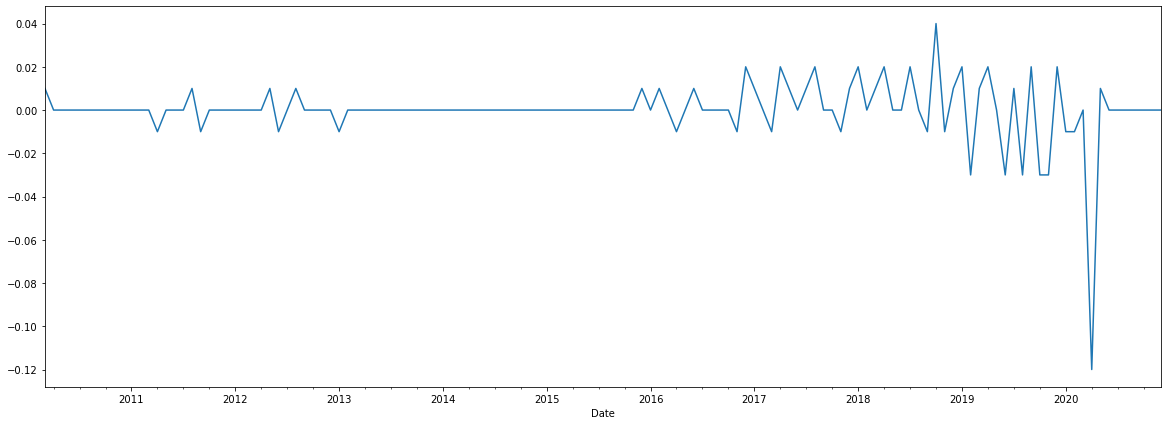

In [320]:
DF['RF1'].plot()
rcParams['figure.figsize'] = 20,7

#### An INSIGHT: the graph already shows us that, over time, the data are trending around an imaginary line at the level between -0,02 and 0,02. This may imply that, over time, the mean is not changing much for example

## 2) Test de la normalité : 

In [236]:
# Fonction de test de Shapiro wilk 

def shapiro_wilk_test(DF, c=0.05): 
  pvalue = shapiro(DF)[1]
  if pvalue < c :
    print('Les données ne suivent pas une loi normale')
  else :
    print('Les données sont distribuées normalement')


In [237]:
for col in DF.columns : 
    print( 'Rendement de', col)
    shapiro_wilk_test(DF[col])
    print('-'*50)

Rendement de AAPL
Les données sont distribuées normalement
--------------------------------------------------
Rendement de DIS
Les données ne suivent pas une loi normale
--------------------------------------------------
Rendement de GS
Les données sont distribuées normalement
--------------------------------------------------
Rendement de NKE
Les données sont distribuées normalement
--------------------------------------------------
Rendement de ^DJI
Les données ne suivent pas une loi normale
--------------------------------------------------
Rendement de SMB
Les données sont distribuées normalement
--------------------------------------------------
Rendement de HML
Les données ne suivent pas une loi normale
--------------------------------------------------
Rendement de RMW
Les données sont distribuées normalement
--------------------------------------------------
Rendement de CMA
Les données sont distribuées normalement
--------------------------------------------------
Rendement de

## 4) Création des variables à expliquer(Y) et des variables explicatives(X)

In [238]:
DF['Y_NKE']=DF['NKE']-DF['RF1']
DF['Y_GS']=DF['GS']-DF['RF1']
DF['Y_DIS']=DF['DIS']-DF['RF1']
DF['Y_AAPL']=DF['AAPL']-DF['RF1']
DF['X1_p_risque']=DF['^DJI']-DF['RF1']
DF['X2_p_risque']=DF['SMB']-DF['RF1']
DF['X3_p_risque']=DF['HML']-DF['RF1']
DF['X4_p_risque']=DF['RMW']-DF['RF1']
DF['X5_p_risque']=DF['CMA']-DF['RF1']

In [239]:
DF1=DF.dropna()
DF1
DF1=DF[['Y_NKE','Y_GS','Y_DIS','Y_AAPL','X1_p_risque','X2_p_risque','X3_p_risque','X4_p_risque','X5_p_risque']]
DF1

,Y_NKE,Y_GS,Y_DIS,Y_AAPL,X1_p_risque,X2_p_risque,X3_p_risque,X4_p_risque,X5_p_risque
Date,,,,,,,,,
2010-03-01,0.077278,0.083781,0.107478,0.138470,0.041463,1.79,2.10,-0.68,1.68
2010-04-01,0.036928,-0.149036,0.055285,0.111021,0.013999,4.99,2.91,0.88,1.69
2010-05-01,-0.046503,-0.006474,-0.092834,-0.016124,-0.079209,0.09,-2.39,1.24,-0.19
2010-06-01,-0.066731,-0.087770,-0.057451,-0.020827,-0.035772,-2.46,-4.52,-0.31,-1.50
2010-07-01,0.094202,0.148930,0.069524,0.022741,0.070792,0.09,-0.36,0.29,2.03
...,...,...,...,...,...,...,...,...,...
2020-08-01,0.146297,0.034906,0.127672,0.214380,0.075742,-0.94,-2.94,4.27,-1.44
2020-09-01,0.124480,-0.013097,-0.059073,-0.100908,-0.022805,0.07,-2.51,-1.15,-1.77
2020-10-01,-0.043492,-0.059362,-0.022808,-0.060012,-0.046077,4.76,4.03,-0.60,-0.53


## 5) Estimation du modéle : 

### Let's define some concepts so as to interpret results below : 

### Intercept : For each variable, our inteRcept is the measurement of how change in that variable affects the independent variable ; in this use case, our regression model is level to level, It is the ‘β’ in ‘y = βx + α’. 

### R-squared :   Our R-squared is the measurement of how much of the independent variables(X1_p_risque, X2_p_risque...) is explained by changes in our dependent variables( Y_NKE, Y_GS...) ;  In percentage terms : 


### Adjusted-R : It is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. herefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. We will see that in Step 10. 

### P-Value : P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely our coefficient is measured through our model by chance. 


In [240]:
CAPM1=smf.ols(formula="Y_NKE~X1_p_risque", data=DF1).fit()
CAPM1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_NKE   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     60.50
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           2.13e-12
Time:                        16:49:22   Log-Likelihood:                 195.56
No. Observations:                 130   AIC:                            -387.1
Df Residuals:                     128   BIC:                            -381.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0120      0.005      2.473      0.015       0.002       0.022
X1_p_risque     0.8161      0.105      7.778      0.000       0.608       1.024
==============================================================================
Omnibus:                       17.158   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.268
Skew:                          -0.557   Prob(JB):                     5.97e-08
Kurtosis:                       5.213   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### -  Intercept :  If our X1_p_risque varies from 1, our Y_NKE varies from 0.0120. 
### -  R-Squared : 0.321 would mean our model explains 32.1 % of the change in our NKE Target variable. 
### - Adjusted R : 0,316. It will be compared to the Adjusted R of Fama French 3 & 5. 
### - P_Value : The p value of 1.5% for NKE is saying there is a 0% chance the X1_p_risque variable has no affect on the dependent variable, Y_NKE : p-value significant =>  Invalid Model 

In [241]:
CAPM2=smf.ols(formula="Y_GS~X2_p_risque", data=DF1).fit()
CAPM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Y_GS   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     23.65
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           3.32e-06
Time:                        16:49:22   Log-Likelihood:                 144.67
No. Observations:                 130   AIC:                            -285.3
Df Residuals:                     128   BIC:                            -279.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0086      0.007      1.225      0.223      -0.005       0.023
X2_p_risque     0.0135      0.003      4.863      0.000       0.008       0.019
==============================================================================
Omnibus:                        1.100   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.667
Skew:                           0.069   Prob(JB):                        0.716
Kurtosis:                       3.322   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### - Intercept : If our X2_p_risque varies from 1, our Y_GS varies from 0.0086.
### - R-Squared : 0.156 would mean our model explains 15.6 % of the change in our NKE  Target variable. 
### - Adjusted R : 0.149. It will be compared to the Adjusted R of Fama French 3 & 5. 
### - P_value : 22.3% chance the X1_p_risque variable has no affect on the dependent variable, Y_GS : p-value insignificant =>  Valid Model.

In [242]:
CAPM3=smf.ols(formula="Y_DIS~X3_p_risque", data=DF1).fit()
CAPM3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_DIS   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.388
Date:                Mon, 14 Jun 2021   Prob (F-statistic):             0.0219
Time:                        16:49:22   Log-Likelihood:                 161.68
No. Observations:                 130   AIC:                            -319.4
Df Residuals:                     128   BIC:                            -313.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0195      0.006      3.104      0.002       0.007       0.032
X3_p_risque     0.0054      0.002      2.321      0.022       0.001       0.010
==============================================================================
Omnibus:                       14.267   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.040
Skew:                           0.640   Prob(JB):                     0.000121
Kurtosis:                       4.301   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### - Intercept :  If our X3_p_risque varies from 1, our Y_p_risque varies from 0.0195.
### - R-Squared : 0.040 would mean our model explains 4 % of the change in our NKE  Target variable.
### - Adjusted R : 0.033 ; It will be compared to the Adjusted R of Fama French 3 & 5. 
### - P-value :  0,2% chance the X1_p_risque variable has no affect on the dependent variable, Y_DIS : p-value significant =>  Invalid Model. 


In [243]:
CAPM4=smf.ols(formula="Y_AAPL~X4_p_risque", data=DF1).fit()
CAPM4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Y_AAPL   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.788
Date:                Mon, 14 Jun 2021   Prob (F-statistic):             0.0538
Time:                        16:49:22   Log-Likelihood:                 144.29
No. Observations:                 130   AIC:                            -284.6
Df Residuals:                     128   BIC:                            -278.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0258      0.007      3.659      0.000       0.012       0.040
X4_p_risque     0.0089      0.005      1.946      0.054      -0.000       0.018
==============================================================================
Omnibus:                        0.952   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                1.041
Skew:                           0.135   Prob(JB):                        0.594
Kurtosis:                       2.655   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intercept : If our X4_p_risque varies from 1, our Y varies from 0.0258. 
### R-Squared : 0.029 would mean our model explains 2.9 % of the change in our NKE  Target variable. 
### Adjusted R :  0.021 ; It will be compared to the Adjusted R of Fama French 3 & 5. 
### P-value : 0 % chance the X1_p_risque variable has no affect on the dependent variable, Y_AAPL : p-value insignificant =>  Valid Model 

### 6) Vérification des hypothéses des MCO : 

### Bias : Close to 0 ==> Model OK ( The expectancy of our residuals must be equal to 0 to accept the Model)

In [244]:
Bias = (1/ len(DF1))* sum(CAPM.resid)
Bias



-5.657867337032048e-18

### RMSE : Measure of the differences between values predicted by the model  and the values observed. Our RMSE below is close to 0 ==> OK 


In [273]:
ypred = CAPM.predict(DF1[['X1_p_risque']])
Yobs=DF1['Y_NKE']
rmse = metrics.mean_squared_error(Yobs, ypred)
rmse

0.0028900130633348698

### VIF : Variance inflation factor estimates :  what percentage the variance is inflated for each coefficient. The more the variance goes up the more the liner relationship between variables is stronger. In our case, there are no collinearity problems beacause our VIF is not more than 5 ( Maximum tolerated is 10). 

In [309]:

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        CAPM=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-CAPM),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=DF1 , dependent_col="Y_NKE")


Y_GS  VIF =  3.1
Y_DIS  VIF =  2.39
Y_AAPL  VIF =  1.8
X1_p_risque  VIF =  4.0
X2_p_risque  VIF =  1.48
X3_p_risque  VIF =  1.94
X4_p_risque  VIF =  1.42
X5_p_risque  VIF =  1.54


### Correlation test : 

In [247]:
def spearman_test(x,y,**kw):    
     stat, p = spearmanr(x, y,**kw) 
     print(f't-stat: {stat}')
     print(f'p-value: {p}')
     if p > 0.05:
         print('independent')
     else:
         print('dependent')

spearman_results = {}
for col in DF1.columns.values:  
        print( ' Correlation of : ', col)
        spearman_results[col] = spearman_test(DF1['Y_NKE'],DF1[col])
        print('-'*50)  
        

 Correlation of :  Y_NKE
t-stat: 1.0
p-value: 0.0
dependent
--------------------------------------------------
 Correlation of :  Y_GS
t-stat: 0.3880839558098567
p-value: 5.061587711346154e-06
dependent
--------------------------------------------------
 Correlation of :  Y_DIS
t-stat: 0.4897704461347281
p-value: 3.342840993960365e-09
dependent
--------------------------------------------------
 Correlation of :  Y_AAPL
t-stat: 0.3085034617432984
p-value: 0.00035559483784544475
dependent
--------------------------------------------------
 Correlation of :  X1_p_risque
t-stat: 0.5382703573720794
p-value: 3.9769759469220553e-11
dependent
--------------------------------------------------
 Correlation of :  X2_p_risque
t-stat: 0.24450556203815332
p-value: 0.0050543228926095115
dependent
--------------------------------------------------
 Correlation of :  X3_p_risque
t-stat: -0.009501829902016694
p-value: 0.9145560605934586
independent
--------------------------------------------------
 C

### Correlation matrix : 

Y_NKE          1.000000
Y_GS           0.388084
Y_DIS          0.489770
Y_AAPL         0.308503
X1_p_risque    0.538270
X2_p_risque    0.244506
X3_p_risque   -0.009502
X4_p_risque    0.003441
X5_p_risque   -0.099212
Name: Y_NKE, dtype: float64

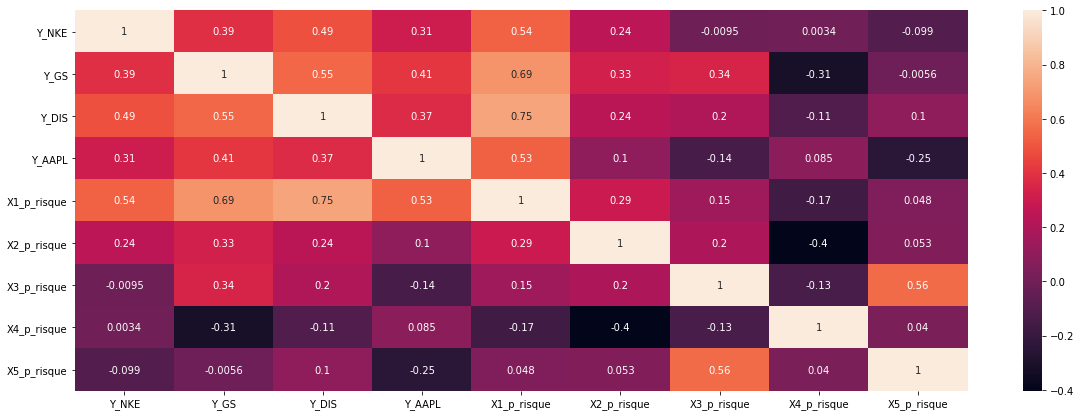

In [248]:
# matrice de corrélation 
corr=DF1.corr('spearman')
sns.heatmap(corr, annot=True)
corryx=corr.iloc[:,0]     
corryx   

## 7) Vérification de la significativité du Alpha de Jansen :

#### The Coefficient intercept in our Model summaries corresponds to our Jensen's Alpha. It's superior to 0 for all our assets. As a result, we can say that our assets outperform the market. 


## 8) Fama French 3 & five factors + tests : 

### - FF 3 factors + tests : 

In [265]:
FF3=smf.ols(formula='Y_NKE~X1_p_risque + X2_p_risque + X3_p_risque ', data=DF1).fit()
FF3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_NKE   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     21.64
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           2.28e-11
Time:                        17:03:11   Log-Likelihood:                 197.41
No. Observations:                 130   AIC:                            -386.8
Df Residuals:                     126   BIC:                            -375.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0105      0.005      2.122      0.036       0.001       0.020
X1_p_risque     0.8041      0.113      7.144      0.000       0.581       1.027
X2_p_risque     0.0025      0.002      1.181      0.240      -0.002       0.007
X3_p_risque    -0.0034      0.002     -1.778      0.078      -0.007       0.000
==============================================================================
Omnibus:                       19.644   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.343
Skew:                          -0.593   Prob(JB):                     3.87e-10
Kurtosis:                       5.569   Cond. No.                         72.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
Biais = (1/ len(DF1))* sum(FF3.resid)
Biais

# Bias CLOSE to 0 ==> Model OK 

7.018958064336928e-17

In [302]:
ypred = FF3.predict(DF1[['X1_p_risque','X2_p_risque','X3_p_risque']])
Yobs=DF1['Y_NKE']
rmse = metrics.mean_squared_error(Yobs, ypred)
rmse

#RMSE close to 0 = > OK 

0.0028089638899568433

In [317]:
# Collinearity 

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        FF3=smf.ols(formula='Y_NKE~X1_p_risque + X2_p_risque + X3_p_risque ', data=DF1).fit().rsquared  
        vif=round(1/(1-FF3),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=DF1 , dependent_col="Y_NKE")


# VIF< 5 ==> OK 

Y_GS  VIF =  1.52
Y_DIS  VIF =  1.52
Y_AAPL  VIF =  1.52
X1_p_risque  VIF =  1.52
X2_p_risque  VIF =  1.52
X3_p_risque  VIF =  1.52
X4_p_risque  VIF =  1.52
X5_p_risque  VIF =  1.52


### - FF 5 factors + tests : 

In [255]:

FF5=smf.ols(formula='Y_NKE~X1_p_risque + X2_p_risque + X3_p_risque+X4_p_risque', data=DF1).fit()
FF5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_NKE   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           3.59e-11
Time:                        16:49:49   Log-Likelihood:                 198.68
No. Observations:                 130   AIC:                            -387.4
Df Residuals:                     125   BIC:                            -373.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0100      0.005      2.042      0.043       0.000       0.020
X1_p_risque     0.7899      0.112      7.036      0.000       0.568       1.012
X2_p_risque     0.0037      0.002      1.676      0.096      -0.001       0.008
X3_p_risque    -0.0036      0.002     -1.879      0.063      -0.007       0.000
X4_p_risque     0.0051      0.003      1.569      0.119      -0.001       0.012
==============================================================================
Omnibus:                       20.711   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.108
Skew:                          -0.617   Prob(JB):                     5.90e-11
Kurtosis:                       5.678   Cond. No.                         73.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
Biais = (1/ len(DF1))* sum(FF5.resid)
Biais

# Bias near to 0 ==> Model OK 

-4.155329926301367e-17

In [306]:
ypred = FF5.predict(DF1[['X1_p_risque','X2_p_risque','X3_p_risque','X4_p_risque','X5_p_risque']])
Yobs=DF1['Y_NKE']
rmse = metrics.mean_squared_error(Yobs, ypred)
rmse

#RMSE close to 0 = > OK 

0.0027547429910307186

In [319]:
# Colinearity : 

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        FF5=smf.ols(formula='Y_NKE~X1_p_risque + X2_p_risque + X3_p_risque+X4_p_risque', data=DF1).fit().rsquared  
        vif=round(1/(1-FF5),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=DF1 , dependent_col="Y_NKE")

Y_GS  VIF =  1.54
Y_DIS  VIF =  1.54
Y_AAPL  VIF =  1.54
X1_p_risque  VIF =  1.54
X2_p_risque  VIF =  1.54
X3_p_risque  VIF =  1.54
X4_p_risque  VIF =  1.54
X5_p_risque  VIF =  1.54


## 9) Comparaison du Fama French 3 et 5 facteurs avec le CAPM : 

### - As we mentioned above, The Adjusted R  is important to compare our Models : For that purpose, let's compare This indicator for our dependent variable Y_NKE   : Adjusted R of CAPM1 =  0.316 - Adjusted R of FF3 =  0.324 Adjusted R of FF5 = 0.332. This means that that our model FF5 si lightly more effecient that FF3 which in  turn is lightly more efficient than CAPM1. 

### - In other words, A higher adjusted score may be telling us some variables that have been added are contributing to our model’s R-squared properly. 